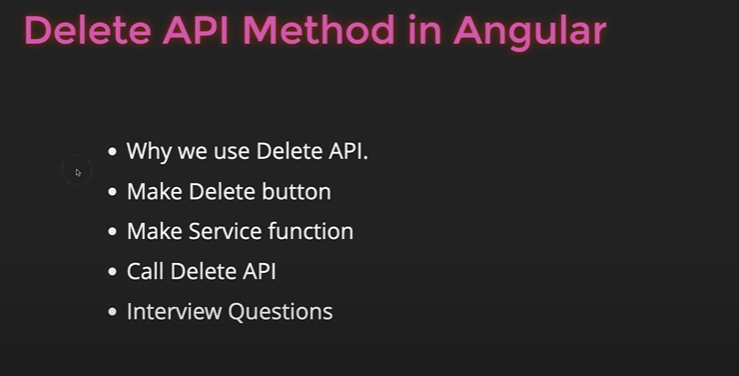

# **app.html**



```
<h1>How to Delete API</h1>

<form (ngSubmit)="addUser(newUser)" #userForm="ngForm">

  <input type="text" name="name" placeholder="Enter name" [(ngModel)]="newUser.name" required />
  <br><br>
  <input type="email" name="email" placeholder="Enter email" [(ngModel)]="newUser.email" required />
  <br><br>
  <input type="text" name="id" placeholder="Enter ID" [(ngModel)]="newUser.id" required />
  <br><br>
  <button type="submit">Add User</button>
</form>

@for (user of users; track user.id) {
 <ul>
  <li>{{ user.name }}</li>
  <li>{{ user.email }}</li>
  <li>{{ user.id }}</li>
  <li><button (click)="deleteUser(user.id)">Delete</button></li>
</ul>
}


```



# **app.ts**



```
import { Component, OnInit } from '@angular/core';
import { CommonModule } from '@angular/common';
import { HttpClientModule } from '@angular/common/http';
import { FormsModule } from '@angular/forms';

import { UsersService } from './services/users';
import { User } from './interfaces/user';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, HttpClientModule, FormsModule],
  templateUrl: './app.html',
  styleUrls: ['./app.css'],
  providers: [UsersService]
})
export class App implements OnInit {
  users: User[] = [];

  newUser: User = {
    id: '',
    name: '',
    email: ''
  };

  constructor(private usersService: UsersService) {}

  ngOnInit() {
    this.getUsers();
  }

  getUsers() {
    this.usersService.getUsers().subscribe((data: User[]) => {
      this.users = data;
    });
  }

  addUser(user: User) {
    this.usersService.saveUser(user).subscribe((data: User) => {
      if (data) {
        this.getUsers();
        this.newUser = { id: '', name: '', email: '' }; // Reset form
      }
    });
  }

  deleteUser(id: string) {
    this.usersService.deleteUser(id).subscribe((data: User) => {
      if (data) {
        this.getUsers();
      }
    });
  }
}

```



# **services-users.ts**



```
import { Injectable } from '@angular/core';
import { HttpClient } from '@angular/common/http';
import { Observable } from 'rxjs';
import { User } from '../interfaces/user';

@Injectable({
  providedIn: 'root'
})
export class UsersService {
  private url = 'http://localhost:3000/users';

  constructor(private http: HttpClient) {}

  // Get list of users
  getUsers(): Observable<User[]> {
    return this.http.get<User[]>(this.url);
  }

  // Save new user
  saveUser(user: User): Observable<User> {
    return this.http.post<User>(this.url, user);
  }

  // Delete user by ID
  deleteUser(id: string): Observable<User> {
    return this.http.delete<User>(`${this.url}/${id}`);
  }
}

```



# **interface-user.ts**



```
export interface User{
 name: string;
  email: string;
  id:string;
}
```



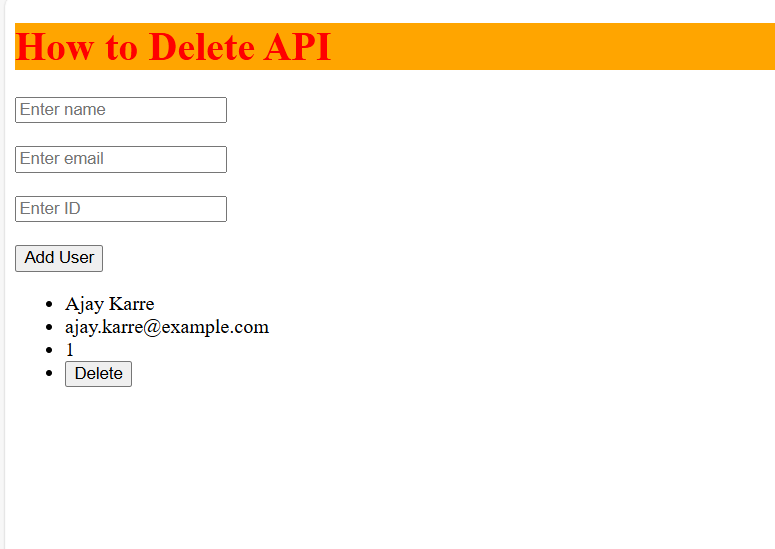

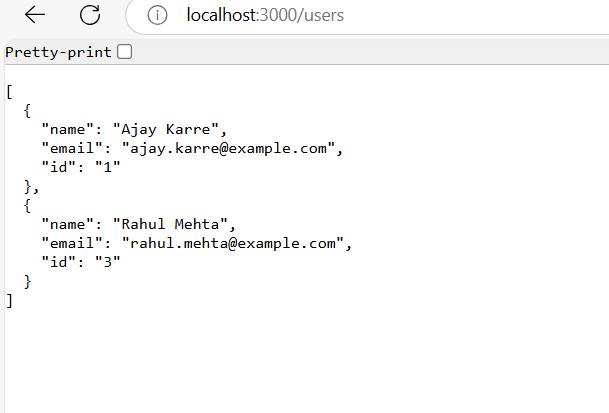

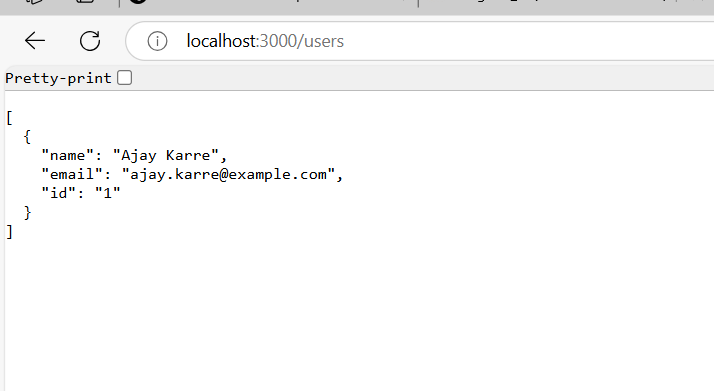

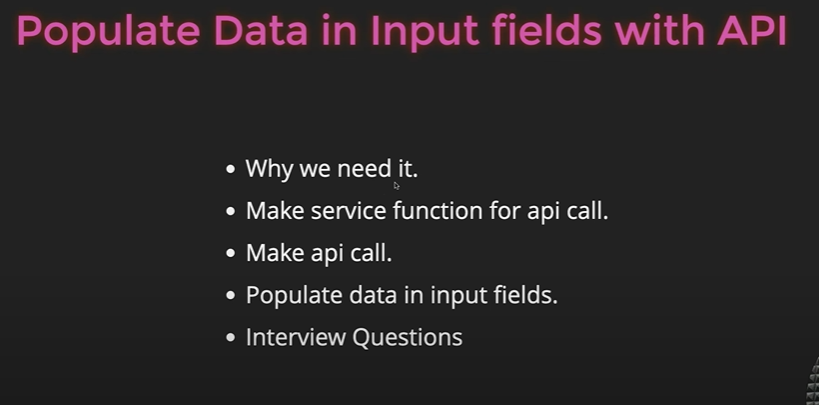

# **app.html**



```
<h1>How to Update API</h1>

<form (ngSubmit)="saveUser()" #userForm="ngForm">

  <input
    type="text"
    name="name"
    placeholder="Enter name"
    [(ngModel)]="newUser.name"
    required
  />
  <br /><br />

  <input
    type="email"
    name="email"
    placeholder="Enter email"
    [(ngModel)]="newUser.email"
    required
  />
  <br /><br />

  <input
    type="text"
    name="id"
    placeholder="Enter ID"
    [(ngModel)]="newUser.id"
    required
  />
  <br /><br />

  <button type="submit">
    {{ selectedUser ? 'Update User' : 'Add User' }}
  </button>
</form>


@for (user of users; track user.id) {
 <ul>
  <li>{{ user.name }}</li>
  <li>{{ user.email }}</li>
  <li>{{ user.id }}</li>
  <li><button (click)="deleteUser(user.id)">Delete</button></li>
  <li><button (click)="selectUser(user.id)">update</button></li>
</ul>
}


```



# **app.ts**



```
import { Component, OnInit } from '@angular/core';
import { CommonModule } from '@angular/common';
import { HttpClientModule } from '@angular/common/http';
import { FormsModule } from '@angular/forms';

import { UsersService } from './services/users';
import { User } from './interfaces/user';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, HttpClientModule, FormsModule],
  templateUrl: './app.html',
  styleUrls: ['./app.css'],
  providers: [UsersService]
})
export class App implements OnInit {
  users: User[] = [];
  selectedUser: User | undefined;

  newUser: User = {
    id: '',
    name: '',
    email: ''
  };

  constructor(private usersService: UsersService) {}

  ngOnInit() {
    this.getUsers();
  }

  getUsers() {
    this.usersService.getUsers().subscribe((data: User[]) => {
      this.users = data;
    });
  }

  saveUser() {
    if (!this.selectedUser) {
      this.usersService.saveUser(this.newUser).subscribe((data: User) => {
        this.getUsers();
        this.resetForm();
      });
    } else {
      this.usersService.updateUser(this.newUser).subscribe((data: User) => {
        this.getUsers();
        this.resetForm();
      });
    }
  }

  deleteUser(id: string) {
    this.usersService.deleteUser(id).subscribe(() => {
      this.getUsers();
    });
  }

  selectUser(id: string) {
    this.usersService.getSelectedUser(id).subscribe((data: User) => {
      this.selectedUser = data;
      this.newUser = { ...data };
    });
  }

  resetForm() {
    this.selectedUser = undefined;
    this.newUser = {
      id: '',
      name: '',
      email: ''
    };
  }
}

```



# **services-users.ts**



```
import { Injectable } from '@angular/core';
import { HttpClient } from '@angular/common/http';
import { Observable } from 'rxjs';
import { User } from '../interfaces/user';

@Injectable({
  providedIn: 'root'
})
export class UsersService {
  private url = 'http://localhost:3000/users';

  constructor(private http: HttpClient) {}

  // Get list of users
  getUsers(): Observable<User[]> {
    return this.http.get<User[]>(this.url);
  }

  // Save new user
  saveUser(user: User): Observable<User> {
    return this.http.post<User>(this.url, user);
  }

  // Update existing user
  updateUser(user: User): Observable<User> {
    return this.http.put<User>(`${this.url}/${user.id}`, user);
  }

  // Delete user by ID
  deleteUser(id: string): Observable<User> {
    return this.http.delete<User>(`${this.url}/${id}`);
  }

  // Get a single user by ID
  getSelectedUser(id: string): Observable<User> {
    return this.http.get<User>(`${this.url}/${id}`);
  }
}

```



# **interfaces-user.ts**



```
export interface User{
 name: string;
  email: string;
  id:string;
}


```



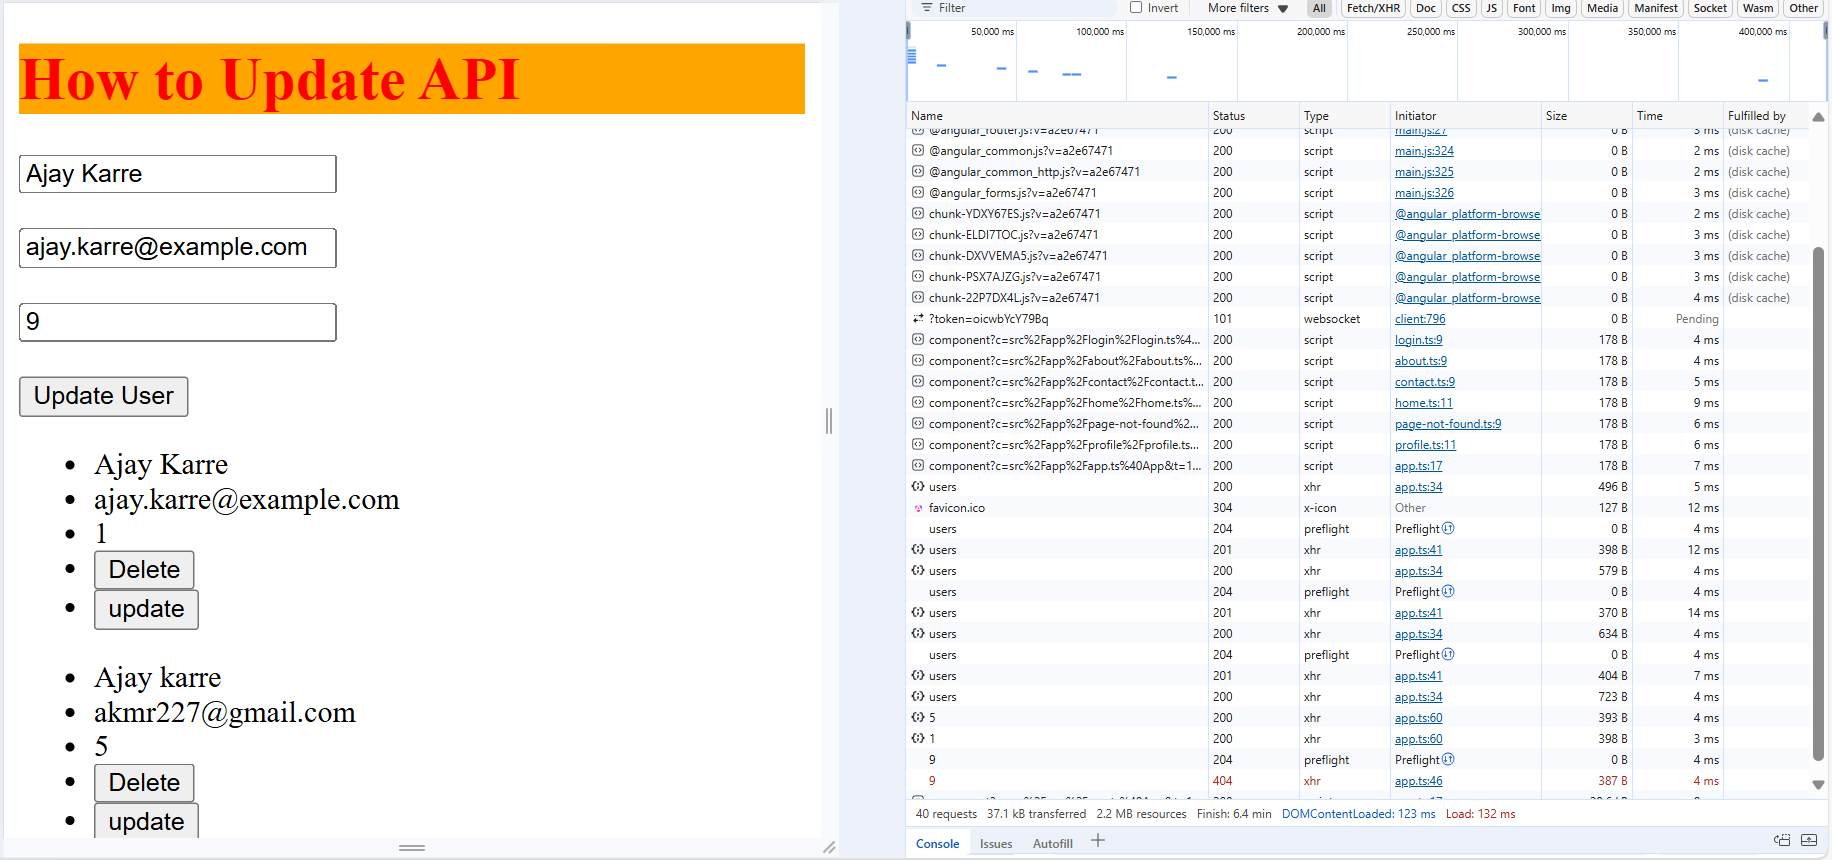

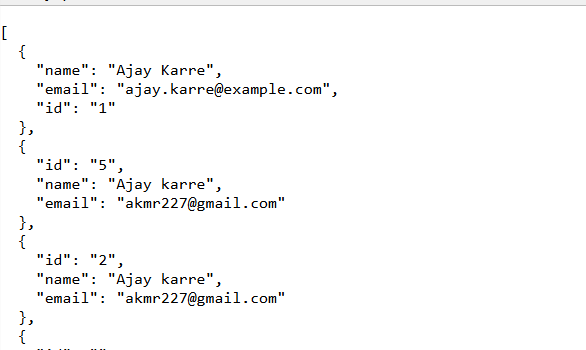

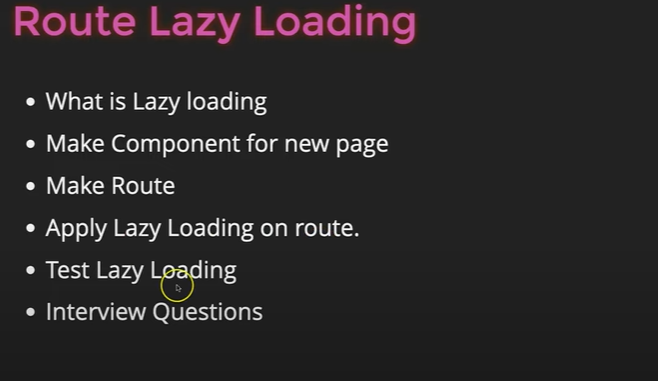

# **✅ 1. What is Lazy Loading?**
Lazy loading means loading modules only when they're needed (on route access), reducing initial load time and improving performance.

# **NOTE:**



```
<router-outlet></router-outlet> is a placeholder directive in Angular where the matched component from the current route will be dynamically rendered.

💡 Simple Explanation:
It acts like a container.

Angular will load the component (like AdminComponent) associated with the current route and place it inside this tag.
```



```
{ path: 'admin', loadComponent: () => import('./admin/admin.component').then(c => c.AdminComponent) }

```





And your user navigates to /admin, then Angular will:

Load AdminComponent

Render it inside <router-outlet>

# **app.html**



```
<h1>Router Lazy Loading</h1>
<a routerLink="/admin">Go to Admin Page</a>
<router-outlet></router-outlet>

```



# **app.ts**



```
import { Component } from '@angular/core';
import { RouterLink, RouterOutlet } from '@angular/router';

@Component({
  selector: 'app-root',
  imports: [RouterOutlet, RouterLink],
  templateUrl: './app.html',
  styleUrls: ['./app.css'],
})
export class App {}

```



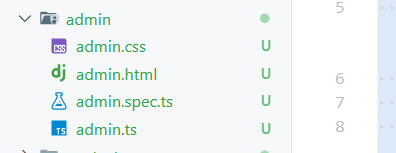

# **app.routes.ts**



```
import { Routes } from '@angular/router';

// Lazy loaded route
export const routes: Routes = [
  // { path: 'admin', component: AdminComponent } // regular loading (commented)
  {
    path: 'admin',
    loadComponent: () => import('./admin/admin')
      .then(c => c.Admin)
  }
];

```



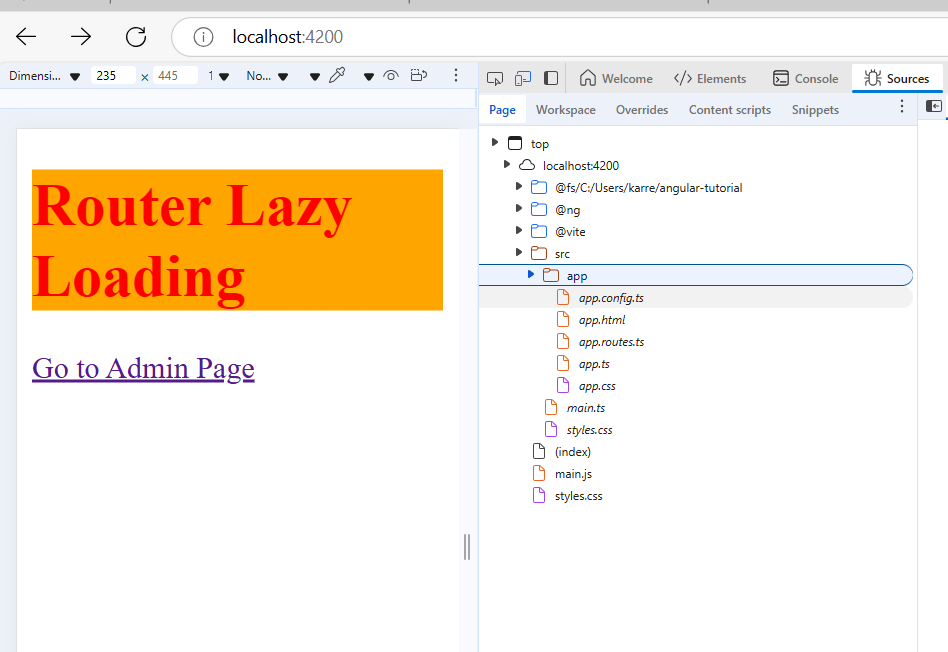

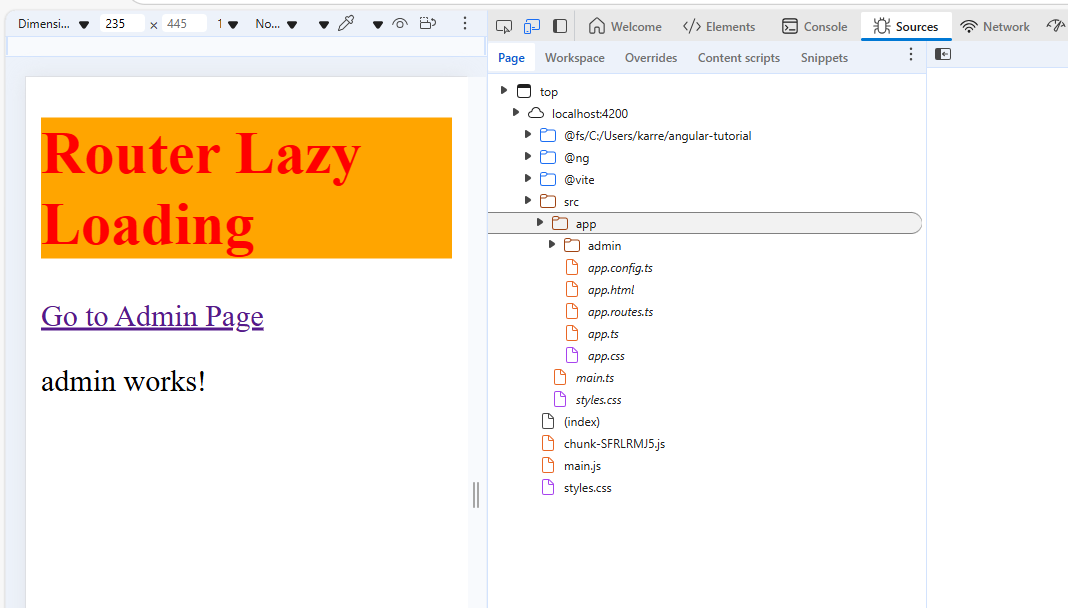